In [1]:
import fiona
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

## Load Data

In [2]:
# load ecology data
df_welikia = pd.read_json("https://www.welikia.org/ecocom_by_block_2.json")
df_welikia.head()

,bid,element1,name1,percent1,element2,name2,percent2,element3,name3,percent3
0,1,600,Marine deepwater community,0.97,608.0,Low salt marsh community,0.01,602.0,Marine intertidal mudflat community,0.01
1,2,600,Marine deepwater community,0.81,602.0,Marine intertidal mudflat community,0.10,608.0,Low salt marsh community,0.08
2,3,600,Marine deepwater community,0.94,602.0,Marine intertidal mudflat community,0.03,608.0,Low salt marsh community,0.02
3,4,600,Marine deepwater community,0.84,602.0,Marine intertidal mudflat community,0.09,608.0,Low salt marsh community,0.03
4,5,728,Appalachian oak-hickory forest community,0.51,647.0,Hemlock-northern hardwood forest community,0.11,608.0,Low salt marsh community,0.11


In [3]:
df_welikia.to_csv("welikia_data.csv")

In [4]:
# load blocks
df_blocks = gpd.read_file("https://www.welikia.org/final_joined_blocks_named.geojson")
gdf_welikia = df_blocks.merge(df_welikia, left_on='new_bid', right_on='bid')
gdf_welikia.head()

,nycb_flg,bid_x,new_bid,nj_flg,ny_flg,name,geometry,bid_y,element1,name1,percent1,element2,name2,percent2,element3,name3,percent3
0,1,2880,2881,0,0,Ellis Island,"MULTIPOLYGON (((-74.04025 40.70013, -74.04019 ...",2881,603,Marine gravel/sand beach community,0.45,728.0,Appalachian oak-hickory forest community,0.29,615.0,Salt shrub community,0.10
1,1,0,1,0,0,Harlem River from Willis Ave Bridge to 3rd Ave...,"MULTIPOLYGON (((-73.93175 40.80777, -73.93146 ...",1,600,Marine deepwater community,0.97,608.0,Low salt marsh community,0.01,602.0,Marine intertidal mudflat community,0.01
2,1,1,2,0,0,Harlem River from 3rd Ave Bridge to Park Ave B...,"MULTIPOLYGON (((-73.93259 40.81005, -73.93246 ...",2,600,Marine deepwater community,0.81,602.0,Marine intertidal mudflat community,0.10,608.0,Low salt marsh community,0.08
3,1,2,3,0,0,Harlem River from Madison Ave Bridge to 145th ...,"MULTIPOLYGON (((-73.93249 40.81934, -73.93249 ...",3,600,Marine deepwater community,0.94,602.0,Marine intertidal mudflat community,0.03,608.0,Low salt marsh community,0.02
4,1,3,4,0,0,Harlem River from Macombs Dam Bridge to Alexan...,"MULTIPOLYGON (((-73.92814 40.84516, -73.92815 ...",4,600,Marine deepwater community,0.84,602.0,Marine intertidal mudflat community,0.09,608.0,Low salt marsh community,0.03


In [5]:
gdf_welikia.shape, df_welikia.shape, df_blocks.shape

((33190, 17), (33190, 10), (33209, 7))

In [6]:
# convert crs
gdf_welikia = gdf_welikia.to_crs(2263)

In [7]:
# get nyc boundaries
gdf_boros = gpd.read_file("https://data.cityofnewyork.us/resource/gthc-hcne.geojson").to_crs(2263)
gdf_boros.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
clipped_gdf = gpd.clip(gdf_welikia, gdf_boros)

In [9]:
clipped_gdf['name1'].unique()

array(['Marine deepwater community', 'Salt shrub community',
       'Successional shrubland community',
       'Coastal oak-hickory forest community', 'Maritime beach community',
       'Coastal white pine-oak forest community',
       'High salt marsh community', 'Shrub swamp community',
       'Oak-tulip tree forest community',
       'Successional fern meadow community', 'Maritime dunes community',
       'Successional southern hardwood forest community',
       'Low salt marsh community', 'Coastal oak-heath forest community',
       'Maritime oak forest community',
       'Marine gravel/sand beach community', 'Maritime bluffs community',
       'Marine rocky intertidal community', 'Tidal creek community',
       'Shallow emergent marsh community',
       'Coastal oak-laurel forest community',
       'Coastal plain pond community',
       'Marine intertidal mudflat community', 'Eutrophic pond community',
       'Red maple-hardwood swamp community',
       'Serpentine barrens communi

In [10]:
gdf_maritime = clipped_gdf[clipped_gdf['name1'].isin(['Marine deepwater community', 'High salt marsh community', 'Shrub swamp community',
'Low salt marsh community', 'Marine gravel/sand beach community', 'Marine rocky intertidal community', 'Tidal creek community',
       'Shallow emergent marsh community', 'Coastal plain pond community',
       'Marine intertidal mudflat community', 'Eutrophic pond community',
       'Red maple-hardwood swamp community', 'Coastal plain pond shore community',
       'Coastal plain stream community', 'Floodplain forest community'])]

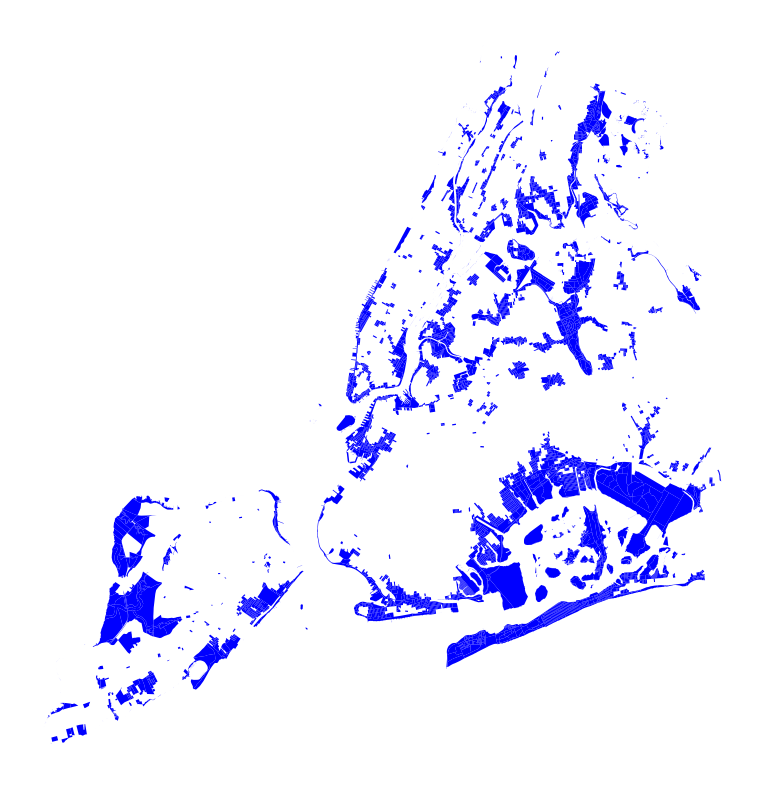

In [11]:
fig, ax =plt.subplots(1,1, figsize=(10,10))
gdf_maritime.plot(facecolor='blue', ax=ax)
ax.set_axis_off()
plt.savefig('historical_wetlands.pdf')

## Load the flood vulnerability index & Sandy Inundation

In [12]:
gdf_fvi = gpd.read_file("https://data.cityofnewyork.us/resource/mrjc-v9pm.geojson?$limit=1000000")
df_sandy = gpd.read_file("https://data.cityofnewyork.us/resource/5xsi-dfpx.geojson?$limit=100000")

In [13]:
path = "/Users/jennah/code/30DoM-2025/2025-11-05 - Earth/NYCFloodStormwaterFloodMaps/NYC Stormwater Flood Map - Moderate Flood (2.13 inches per hr) with Current Sea Levels/NYC_Stormwater_Flood_Map_Moderate_Flood_2_13_inches_per_hr_with_Current_Sea_Levels.gdb"

In [14]:
df_stormwater_flooding = gpd.read_file(path, layer_name='NYC_Stormwater_Flood_Map_Moderate_Flood_2_13_inches_per_hr_with_Current_Sea_Levels')

/Users/jennah/code/30DoM-2025/2025-11-05 - Earth/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver OpenFileGDB does not support open option LAYER_NAME
  return ogr_read(
/Users/jennah/code/30DoM-2025/2025-11-05 - Earth/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


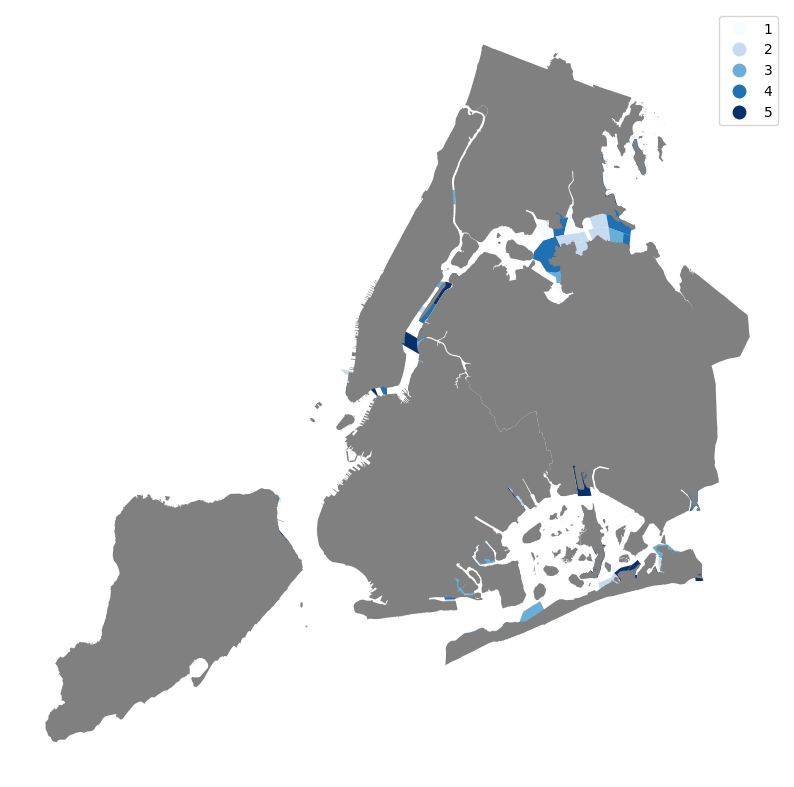

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
# df_sandy.to_crs(2263).plot(facecolor='blue', ax=ax)
gdf_fvi.to_crs(2263).plot(column='tid_50s', ax=ax, cmap='Blues', legend=True)
# df_stormwater_flooding.to_crs(2263).plot(ax=ax, facecolor='lightblue')
gdf_boros.plot(facecolor='gray', ax=ax)
ax.set_axis_off()
plt.savefig('historical_sandy_fvi.pdf')

## Now for vegetation

In [ ]:
gdf_vegetation = clipped_gdf[clipped_gdf['name1'].isin(['Salt shrub community', 'Successional shrubland community',
       'Coastal oak-hickory forest community', 'Coastal white pine-oak forest community', 'Oak-tulip tree forest community',
       'Successional fern meadow community', 'Successional southern hardwood forest community', 'Coastal oak-heath forest community',
       'Maritime oak forest community', 'Coastal oak-laurel forest community', 'Red maple-hardwood swamp community', 'Appalachian oak-hickory forest community', 'Maritime heathland community',
       'Appalachian oak-pine [white pine-oak] forest community',
       'Successional blueberry heath community',
       'Hempstead Plains grassland community',
       'Maritime shrubland community', 'Hemlock-northern hardwood forest community',
       'Maritime beech forest community',
       'Successional old field community'])]

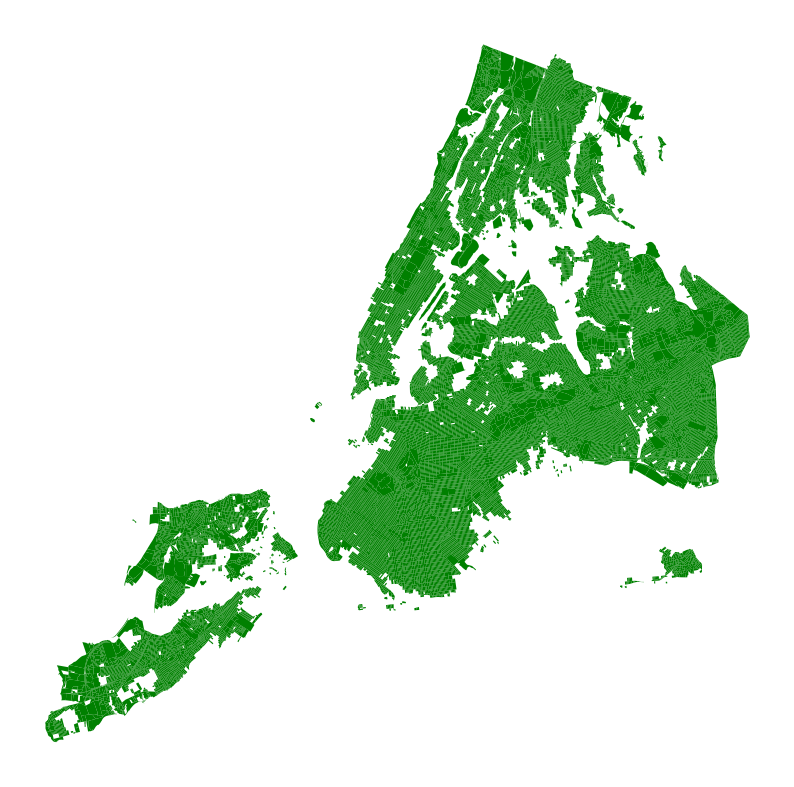

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(10,10))
gdf_vegetation.plot(facecolor='green', ax=ax)
ax.set_axis_off()
plt.savefig('historical_vegetation.pdf')